This is a script for comparing the test RMSE between post-processed visibility deterministic forecasts using quantile regression forest on conditional median and using random forest regression on conditional mean. This script produces the Figure 4.11 and 4.12 in the report.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"raw_data_EUPPBench/"
result_path = ROOT+"trained_models/lead_time_continuous/"

In [3]:
# Results df of random forest regression on conditional mean
df_test_result = pd.read_csv(result_path + "results_giant_20_300.csv")
test_error_rf = df_test_result['error_rf']

# Results df of random forest regression on conditional mean (modelling log-transformed vis obs)
df_test_result_log = pd.read_csv(result_path + "results_giant_log_20_300.csv")
test_error_rf_log = df_test_result_log['error_rf']

# Results df of quantile regression forest
df_test_result_quantile = pd.read_csv(result_path + "results_giant_20_300_quantile.csv")
test_error_rf_quantile = df_test_result_quantile['vis_obs'] - df_test_result_quantile['vis_rf_26'] # modelled median

# Modelling raw visibility observations

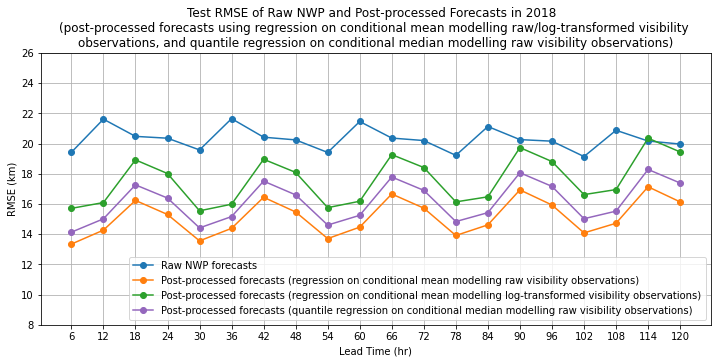

In [6]:
## Plot test RMSE by lead time
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_rf = []
rmse_rf_log = []
rmse_rf_quantile = []
rmse_forecast = []
rmse_baseline = []
rmse_baseline_log = []

for l in lead_hr:
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    rmse_rf.append(np.sqrt(np.mean(test_error_rf[df_test_result['lead_hr']==l]**2)))
    rmse_rf_log.append(np.sqrt(np.mean(test_error_rf_log[df_test_result_log['lead_hr']==l]**2)))
    rmse_rf_quantile.append(np.sqrt(np.mean(test_error_rf_quantile[df_test_result_quantile['lead_hr']==l]**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    
rmse_rf = np.array(rmse_rf)/1000
rmse_rf_log = np.array(rmse_rf_log)/1000
rmse_rf_quantile = np.array(rmse_rf_quantile)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000
rmse_baseline_log = np.array(rmse_baseline_log)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (regression on conditional mean modelling raw visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_log, 'o-', label='Post-processed forecasts (regression on conditional mean modelling log-transformed visibility observations)', c='tab:green')
ax1.plot(lead_hr, rmse_rf_quantile, 'o-', label='Post-processed forecasts (quantile regression on conditional median modelling raw visibility observations)', c='tab:purple')
ax1.set_ylim(8,26)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP and Post-processed Forecasts in 2018  \n(post-processed forecasts using regression on conditional mean modelling raw/log-transformed visibility \nobservations, and quantile regression on conditional median modelling raw visibility observations)")
ax1.legend(loc='lower right')

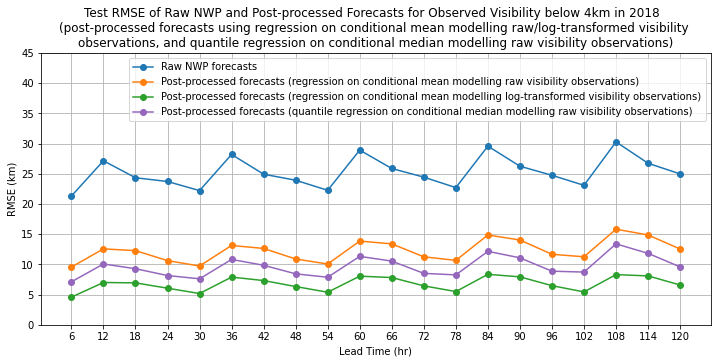

In [8]:
# Focus on obs below 4km
rmse_rf = []
rmse_rf_log = []
rmse_rf_quantile = []
rmse_forecast = []

for l in lead_hr:
    df_result_lead = df_test_result[(df_test_result['lead_hr']==l) & (df_test_result['vis_obs']<=4000)]
    df_result_lead_log = df_test_result_log[(df_test_result_log['lead_hr']==l) & (df_test_result_log['vis_obs']<=4000)]
    df_result_lead_quantile = df_test_result_quantile[(df_test_result_quantile['lead_hr']==l) & (df_test_result_quantile['vis_obs']<=4000)]
    rmse_rf.append(np.sqrt(np.mean(test_error_rf[(df_test_result['lead_hr']==l) & (df_test_result['vis_obs']<=4000)]**2)))
    rmse_rf_quantile.append(np.sqrt(np.mean(test_error_rf_quantile[(df_test_result_quantile['lead_hr']==l) & (df_test_result_quantile['vis_obs']<=4000)]**2)))
    rmse_rf_log.append(np.sqrt(np.mean(test_error_rf_log[(df_test_result_log['lead_hr']==l) & (df_test_result_log['vis_obs']<=4000)]**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_log = np.array(rmse_rf_log)/1000
rmse_rf_quantile = np.array(rmse_rf_quantile)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000
rmse_baseline_log = np.array(rmse_baseline_log)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (regression on conditional mean modelling raw visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_log, 'o-', label='Post-processed forecasts (regression on conditional mean modelling log-transformed visibility observations)', c='tab:green')
ax1.plot(lead_hr, rmse_rf_quantile, 'o-', label='Post-processed forecasts (quantile regression on conditional median modelling raw visibility observations)', c='tab:purple')
ax1.set_ylim(0,45)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP and Post-processed Forecasts for Observed Visibility below 4km in 2018  \n(post-processed forecasts using regression on conditional mean modelling raw/log-transformed visibility \nobservations, and quantile regression on conditional median modelling raw visibility observations)")
ax1.legend(loc='upper right')

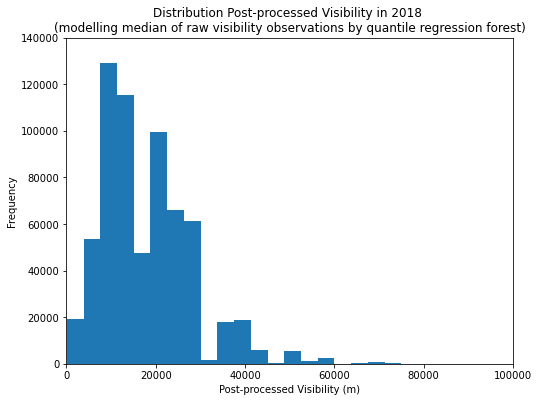

In [16]:
# Distribution of calibrated visibility forecasts
plt.figure(figsize=(8,6))
plt.hist(df_test_result_quantile['vis_rf_26'], bins=20)
plt.xlim(0,100000)
plt.ylim(0,140000)
plt.xlabel("Post-processed Visibility (m)")
plt.ylabel("Frequency")
plt.title("Distribution Post-processed Visibility in 2018 \n(modelling median of raw visibility observations by quantile regression forest)")

# Modelling log-transfomred visibility observations

In [4]:
# Results df of quantile regression forest
df_test_result_quantile_log = pd.read_csv(result_path + "results_giant_20_300_quantile_log.csv")
test_error_rf_quantile_log = df_test_result_quantile_log['vis_obs'] - df_test_result_quantile_log['vis_rf_26'] # modelled median

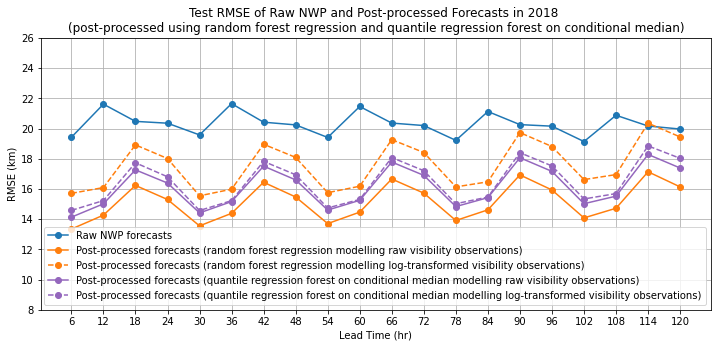

In [7]:
## Plot test RMSE by lead time
import xarray as xr
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

rmse_rf = []
rmse_rf_log = []
rmse_rf_quantile_log = []
rmse_forecast = []
rmse_baseline = []
rmse_baseline_log = []

for l in lead_hr:
    df_result_lead = df_test_result[df_test_result['lead_hr']==l]
    rmse_rf.append(np.sqrt(np.mean(test_error_rf[df_test_result['lead_hr']==l]**2)))
    rmse_rf_log.append(np.sqrt(np.mean(test_error_rf_log[df_test_result_log['lead_hr']==l]**2)))
    rmse_rf_quantile_log.append(np.sqrt(np.mean(test_error_rf_quantile_log[df_test_result_quantile_log['lead_hr']==l]**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    
rmse_rf = np.array(rmse_rf)/1000
rmse_rf_log = np.array(rmse_rf_log)/1000
rmse_rf_quantile_log = np.array(rmse_rf_quantile_log)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000
rmse_baseline_log = np.array(rmse_baseline_log)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (random forest regression modelling raw visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_log, 'o--', label='Post-processed forecasts (random forest regression modelling log-transformed visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_quantile, 'o-', label='Post-processed forecasts (quantile regression forest on conditional median modelling raw visibility observations)', c='tab:purple')
ax1.plot(lead_hr, rmse_rf_quantile_log, 'o--', label='Post-processed forecasts (quantile regression forest on conditional median modelling log-transformed visibility observations)', c='tab:purple')
ax1.set_ylim(8,26)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP and Post-processed Forecasts in 2018 \n(post-processed using random forest regression and quantile regression forest on conditional median)")
ax1.legend(loc='lower right')

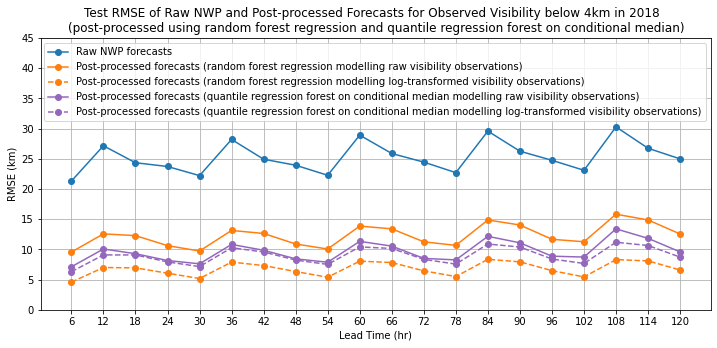

In [9]:
# Focus on obs below 4km
rmse_rf = []
rmse_rf_log = []
rmse_rf_quantile_log = []
rmse_forecast = []

for l in lead_hr:
    df_result_lead = df_test_result[(df_test_result['lead_hr']==l) & (df_test_result['vis_obs']<=4000)]
    df_result_lead_log = df_test_result_log[(df_test_result_log['lead_hr']==l) & (df_test_result_log['vis_obs']<=4000)]
    df_result_lead_quantile_log = df_test_result_quantile_log[(df_test_result_quantile_log['lead_hr']==l) & (df_test_result_quantile_log['vis_obs']<=4000)]
    rmse_rf.append(np.sqrt(np.mean(test_error_rf[(df_test_result['lead_hr']==l) & (df_test_result['vis_obs']<=4000)]**2)))
    rmse_rf_quantile_log.append(np.sqrt(np.mean(test_error_rf_quantile_log[(df_test_result_quantile_log['lead_hr']==l) & (df_test_result_quantile_log['vis_obs']<=4000)]**2)))
    rmse_rf_log.append(np.sqrt(np.mean(test_error_rf_log[(df_test_result_log['lead_hr']==l) & (df_test_result_log['vis_obs']<=4000)]**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_log = np.array(rmse_rf_log)/1000
rmse_rf_quantile_log = np.array(rmse_rf_quantile_log)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000
rmse_baseline_log = np.array(rmse_baseline_log)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_rf, 'o-', label='Post-processed forecasts (random forest regression modelling raw visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_log, 'o--', label='Post-processed forecasts (random forest regression modelling log-transformed visibility observations)', c='tab:orange')
ax1.plot(lead_hr, rmse_rf_quantile, 'o-', label='Post-processed forecasts (quantile regression forest on conditional median modelling raw visibility observations)', c='tab:purple')
ax1.plot(lead_hr, rmse_rf_quantile_log, 'o--', label='Post-processed forecasts (quantile regression forest on conditional median modelling log-transformed visibility observations)', c='tab:purple')
ax1.set_ylim(0,45)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP and Post-processed Forecasts for Observed Visibility below 4km in 2018  \n(post-processed using random forest regression and quantile regression forest on conditional median)")
ax1.legend(loc='upper right')